In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from koreanize_matplotlib import koreanize
koreanize()

In [11]:
pd.read_csv('../data/realistic_sales_data.csv')

,date,sales
0,2020-01-01,114.0
1,2020-01-02,100.0
2,2020-01-03,121.0
3,2020-01-04,201.0
4,2020-01-05,154.0
...,...,...
1822,2024-12-27,489.0
1823,2024-12-28,534.0
1824,2024-12-29,558.0
1825,2024-12-30,510.0


### 타임시리즈 데이터 분석에 Prophet 을 이용해보자.

In [20]:
! pip install prophet

In [24]:
from prophet import Prophet

### 매출 시각화

In [25]:
df = pd.read_csv('../data/realistic_sales_data.csv')

In [26]:
df.head()

,date,sales
0,2020-01-01,114.0
1,2020-01-02,100.0
2,2020-01-03,121.0
3,2020-01-04,201.0
4,2020-01-05,154.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1827 non-null   object 
 1   sales   1827 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


In [28]:
df = pd.read_csv('../data/realistic_sales_data.csv', parse_dates=['date'])

In [29]:
df

,date,sales
0,2020-01-01,114.0
1,2020-01-02,100.0
2,2020-01-03,121.0
3,2020-01-04,201.0
4,2020-01-05,154.0
...,...,...
1822,2024-12-27,489.0
1823,2024-12-28,534.0
1824,2024-12-29,558.0
1825,2024-12-30,510.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1827 non-null   datetime64[ns]
 1   sales   1827 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


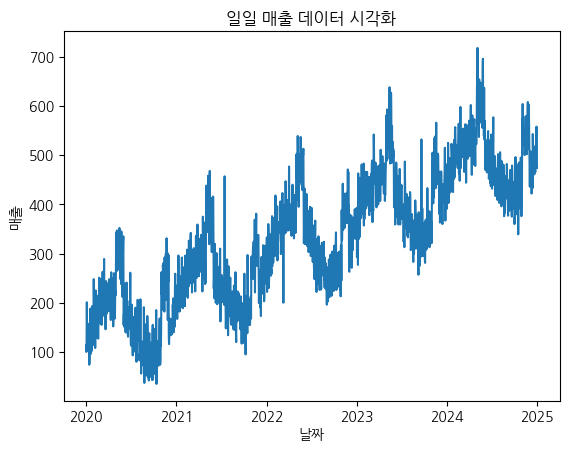

In [31]:
plt.plot( df['date'], df['sales'], label='일일 매출' )
plt.title('일일 매출 데이터 시각화')
plt.xlabel('날짜')
plt.ylabel('매출')
plt.show()

In [32]:
model = Prophet()

### 프로펫 라이브러리의 fit 함수에는 데이터프레임을 넣되,
### 필수인 컬럼이 있어야 한다. 날짜컬럼은 ds, 예측하고 싶은 y 가 있어야 한다.

In [34]:
model.fit(df)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [35]:
df.head()

,date,sales
0,2020-01-01,114.0
1,2020-01-02,100.0
2,2020-01-03,121.0
3,2020-01-04,201.0
4,2020-01-05,154.0


In [36]:
df.rename( columns= {'date' : 'ds' , 'sales' : 'y' })

,ds,y
0,2020-01-01,114.0
1,2020-01-02,100.0
2,2020-01-03,121.0
3,2020-01-04,201.0
4,2020-01-05,154.0
...,...,...
1822,2024-12-27,489.0
1823,2024-12-28,534.0
1824,2024-12-29,558.0
1825,2024-12-30,510.0


In [37]:
df.columns = ['ds','y']

In [38]:
df.head()

,ds,y
0,2020-01-01,114.0
1,2020-01-02,100.0
2,2020-01-03,121.0
3,2020-01-04,201.0
4,2020-01-05,154.0


In [39]:
model.fit(df)

10:08:49 - cmdstanpy - INFO - Chain [1] start processing
10:08:50 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# 미래 데이터를 저장할 데이터프레임을 생성한다.

In [52]:
future = model.make_future_dataframe(periods=365, freq='D')

In [53]:
# 실제로 예측한다.

In [54]:
forecast = model.predict(future)

In [55]:
# 예측 결과를 프로펫 라이브러리는 시각화 함수를 제공한다.

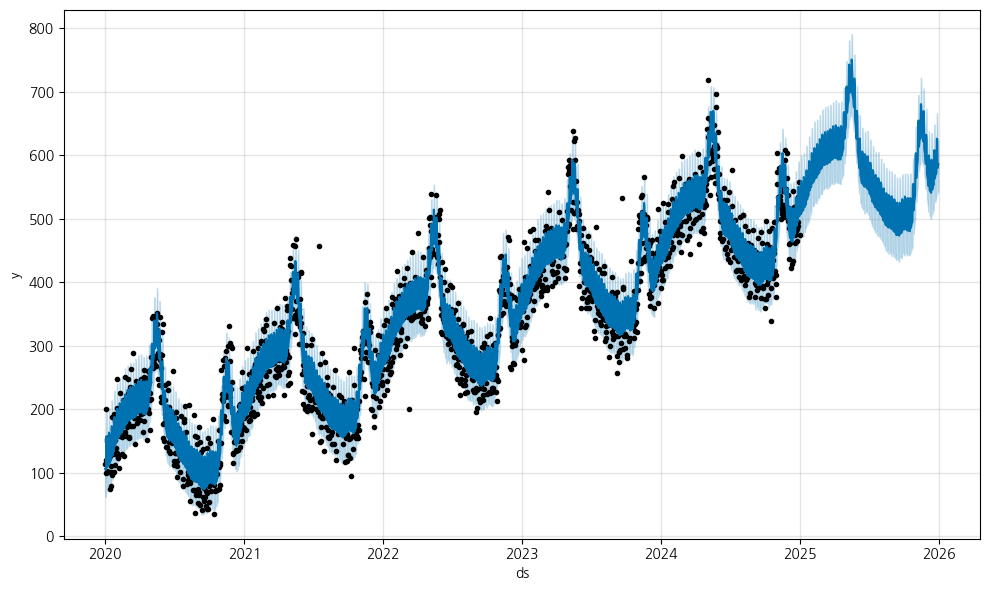

In [56]:
model.plot(forecast)
plt.show()

## 트렌드 및 계절성 시각화

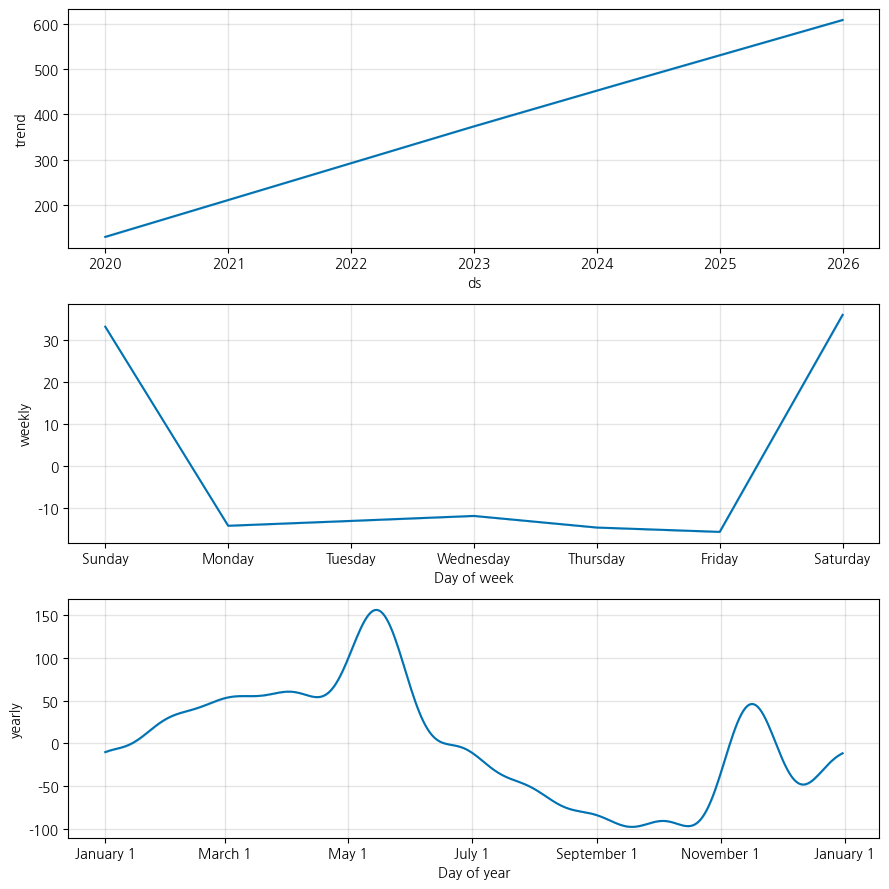

In [57]:
model.plot_components(forecast)
plt.show()

## 휴일 데이터 처리도 중요하다.

In [62]:
holidays = pd.read_csv('../data/holidays.csv', index_col=0, parse_dates=['ds'])

In [63]:
holidays

,holiday,ds,lower_window,upper_window
0,new_year,2020-01-01,0,1
1,promotion_may,2021-05-15,0,1
2,promotion_nov,2022-11-20,0,1
3,black_friday,2023-11-24,0,1


In [64]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   holiday       4 non-null      object        
 1   ds            4 non-null      datetime64[ns]
 2   lower_window  4 non-null      int64         
 3   upper_window  4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 160.0+ bytes


In [65]:
model = Prophet(holidays=holidays)

In [66]:
model.fit(df)

10:40:03 - cmdstanpy - INFO - Chain [1] start processing
10:40:03 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
future = model.make_future_dataframe(periods=365, freq='D')

In [68]:
future

,ds
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
2187,2025-12-27
2188,2025-12-28
2189,2025-12-29
2190,2025-12-30


In [69]:
forecast = model.predict(future)

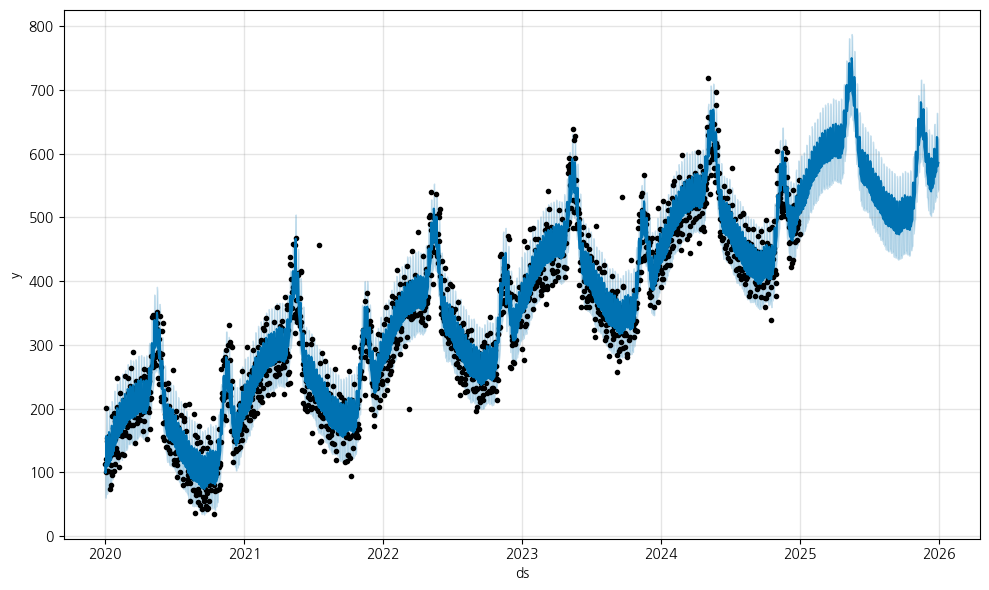

In [70]:
model.plot(forecast)
plt.show()

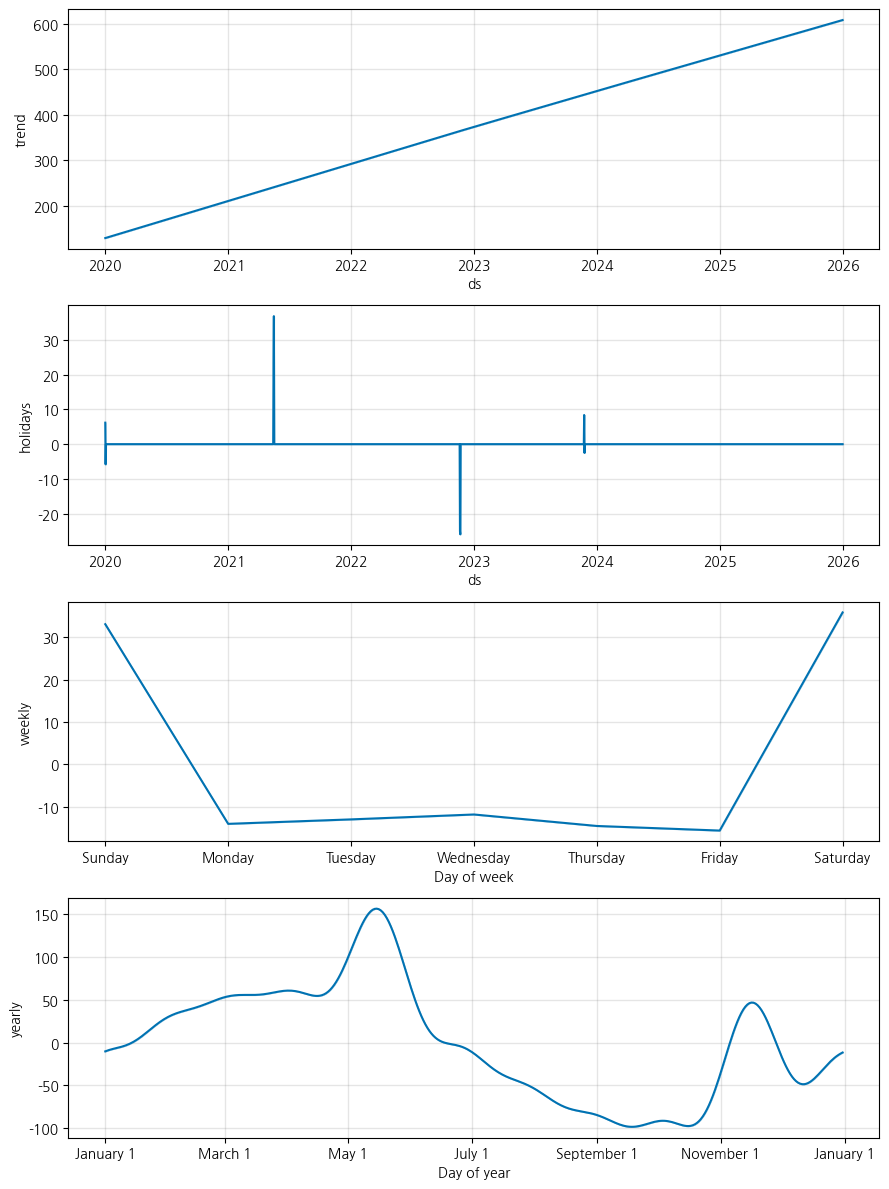

In [71]:
model.plot_components(forecast)
plt.show()